# Universal Bank dataset

In [1]:
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

import dmba

%matplotlib inline

import seaborn as sns


no display found. Using non-interactive Agg backend


In [2]:
UB_df = pd.read_csv('UniversalBank.csv')

In [4]:
UB_df.shape

(5000, 14)

In [5]:
UB_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#Partition the data into train and valid. Make sure you set seed
trainData = UB_df.sample(frac=0.6, random_state=1)
# sample 40% of the row IDs into the validation set, 
validData = UB_df.drop(trainData.index) 
trainData.shape

(3000, 14)

In [7]:
validData.shape

(2000, 14)

In [8]:
UB_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
UB_df.columns = [s.strip().replace(' ', '_') for s in UB_df.columns]
UB_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
UB_df['Number'] = UB_df.index
UB_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Number
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,2
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,3
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,4


In [11]:
UB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  Number              5000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 586.1 KB


In [12]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage']])  # Note the use of an array of column names

# Transform the full dataset
UBNorm = pd.concat([pd.DataFrame(scaler.transform(UB_df[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage']]), 
                                    columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg','zMortgage']),
                       UB_df[['Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Number']]], axis=1)


In [13]:
trainNorm = UBNorm.iloc[trainData.index]
#Similarly, get the valid one as well
validNorm = UBNorm.iloc[validData.index]
trainNorm.head()

,zAge,zExperience,zIncome,zFamily,zCCAvg,zMortgage,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Number
2764,-1.220774,-1.287381,0.227968,-1.218683,0.544567,0.480730,3,0,0,0,0,1,2764
4767,-0.873123,-0.940058,-0.629910,0.533557,-0.596501,0.441459,1,0,1,0,0,0,4767
3814,-0.960036,-0.940058,-0.849878,0.533557,-0.368287,-0.550135,1,0,0,0,0,0,3814
3499,0.343652,0.275572,0.887874,-1.218683,-0.938821,2.257743,1,0,0,0,1,0,3499
2735,-0.786211,-0.679566,-0.079988,0.533557,0.373407,1.069795,2,0,0,0,1,0,2735


In [14]:
validNorm.head()

,zAge,zExperience,zIncome,zFamily,zCCAvg,zMortgage,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Number
0,-1.742249,-1.634704,-0.541922,1.409677,-0.197127,-0.550135,1,0,1,0,0,0,0
2,-0.525473,-0.419074,-1.377803,-1.218683,-0.539447,-0.550135,1,0,0,0,0,0,2
8,-0.873123,-0.853228,0.161978,0.533557,-0.767661,0.470912,2,0,0,0,1,0,8
9,-0.960036,-0.940058,2.339667,-1.218683,3.967769,-0.550135,3,1,0,0,0,0,9
14,1.908078,1.838525,0.843880,-1.218683,0.031086,-0.550135,1,0,1,0,0,0,14


In [15]:
UBCus = pd.DataFrame([{'Age': 32,
    'Experience': 6,
    'Income': 60,
    'Family': 2,
    'CCAvg': 1.2,
    'Education': 3, 
    'Mortgage': 10,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 1,
    'CreditCard': 1}])
UBCus

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,32,6,60,2,1.2,3,10,1,0,1,1


In [16]:
newNorm = pd.DataFrame(scaler.transform(UBCus[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage']]), 
                                    columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg','zMortgage'])
newNorm

,zAge,zExperience,zIncome,zFamily,zCCAvg,zMortgage
0,-1.133861,-1.20055,-0.299957,-0.342563,-0.42534,-0.451957


In [19]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage']], trainNorm['Personal_Loan'])
distances, indices = knn.kneighbors(newNorm)
print(knn.predict(newNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

[0]
Distances [[0.38957508 0.39844622 0.42895104]]
Indices [[ 435 2125  864]]
          zAge  zExperience   zIncome   zFamily    zCCAvg  zMortgage  \
2037 -0.873123    -1.026889 -0.475931 -0.342563 -0.539447  -0.550135   
1322 -1.133861    -1.287381 -0.563919 -0.342563 -0.157190  -0.550135   
4061 -1.046948    -1.461043 -0.321953 -0.342563 -0.111547  -0.550135   

      Education  Personal_Loan  Securities_Account  CD_Account  Online  \
2037          2              0                   0           0       0   
1322          2              0                   1           1       1   
4061          3              0                   0           0       1   

      CreditCard  Number  
2037           1    2037  
1322           1    1322  
4061           0    4061  


In [20]:
knn.kneighbors(validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage']])

(array([[0.23766718, 0.24172061, 0.25195152],
        [0.25441739, 0.31434659, 0.33696491],
        [0.37711687, 0.66251101, 0.7370621 ],
        ...,
        [0.13945652, 0.14343687, 0.14998455],
        [0.02199686, 0.13049449, 0.15067583],
        [0.31434659, 0.32978729, 0.43654159]]),
 array([[ 478,   61, 1298],
        [ 899,  195,  441],
        [ 639, 2671, 1661],
        ...,
        [  42,   68, 1566],
        [2074, 1260,  499],
        [ 515,  259,  771]]))

In [21]:
#Try using knn for valid dataset
knn.kneighbors(validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage']])
knn.predict(validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage']])

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
train_X = trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']]
train_y = trainNorm['Personal_Loan']
valid_X = validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']]
valid_y = validNorm['Personal_Loan']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1    0.9640
1    2    0.9555
2    3    0.9670
3    4    0.9615
4    5    0.9650
5    6    0.9575
6    7    0.9620
7    8    0.9575
8    9    0.9615
9   10    0.9580
10  11    0.9590
11  12    0.9535
12  13    0.9580
13  14    0.9540


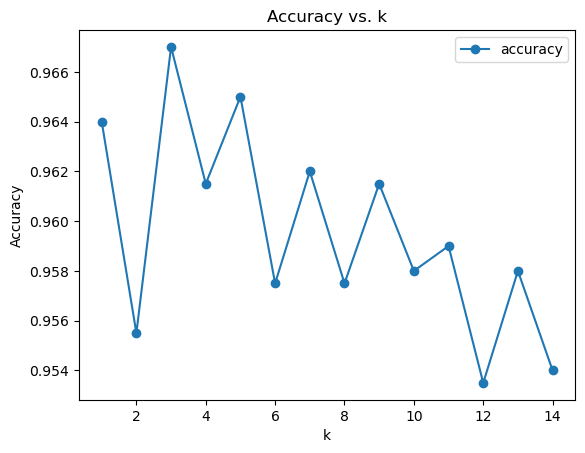

In [32]:
import matplotlib.pyplot as plt

# Assuming 'results' DataFrame is already defined

# Plotting accuracy vs. k
ax = results.plot(x='k', y='accuracy', marker='o', linestyle='-')
ax.set(title='Accuracy vs. k', xlabel='k', ylabel='Accuracy')
plt.show()

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
UB_df.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Number'],
      dtype='object')

In [26]:
UB_df.columns = [s.strip().replace(' ', '_') for s in UB_df.columns]
UB_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Number'],
      dtype='object')

In [27]:
UB_df_encoded = pd.get_dummies(UB_df, columns=['Family', 'Education'], drop_first=True)
print(UB_df_encoded)

        ID  Age  Experience  Income  ZIP_Code  CCAvg  Mortgage  Personal_Loan  \
0        1   25           1      49     91107    1.6         0              0   
1        2   45          19      34     90089    1.5         0              0   
2        3   39          15      11     94720    1.0         0              0   
3        4   35           9     100     94112    2.7         0              0   
4        5   35           8      45     91330    1.0         0              0   
...    ...  ...         ...     ...       ...    ...       ...            ...   
4995  4996   29           3      40     92697    1.9         0              0   
4996  4997   30           4      15     92037    0.4        85              0   
4997  4998   63          39      24     93023    0.3         0              0   
4998  4999   65          40      49     90034    0.5         0              0   
4999  5000   28           4      83     92612    0.8         0              0   

      Securities_Account  C

In [29]:
!pip install graphviz

Classes: 0, 1


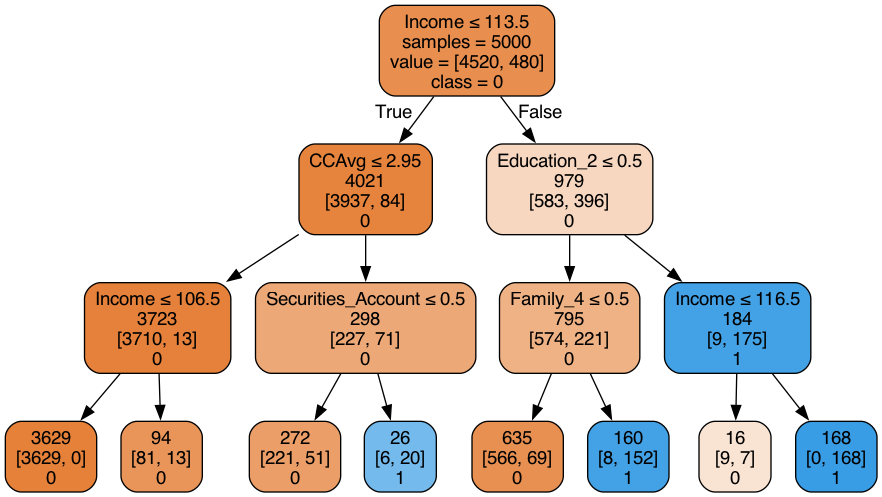

In [31]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

#Try changing max_depth to 3
classTree1 = DecisionTreeClassifier(random_state=0, max_depth=3)
classTree1.fit(UB_df_encoded.drop(columns=['Personal_Loan']), UB_df_encoded['Personal_Loan']) #First one is X (predictors) and the second one is Y (target)
classes_str = [str(c) for c in classTree1.classes_]
print("Classes: {}".format(', '.join(classes_str)))
plotDecisionTree(classTree1, feature_names=UB_df_encoded.columns[:17], class_names=classTree1.classes_)

# eBayAuctions data

# PART B

# Classification and Regression Trees

In [33]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [34]:
auction_df = pd.read_csv('eBayAuctions.csv')

In [36]:
auction_df.head(5)

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [37]:
auction_df.tail(5)

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1
1971,Automotive,US,145,7,Sat,999.00,999.00,0


In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the actual file name
auction_df.columns



Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

In [39]:
auction_df_encoded = pd.get_dummies(auction_df, columns=['Category', 'currency', 'endDay'], drop_first=True)
print(auction_df_encoded)
# If there are still non-numeric values, convert them to numeric
auction_df_encoded['Competitive?'] = pd.to_numeric(auction_df_encoded['Competitive?'], errors='coerce')

# Drop any rows with missing values
auction_df_encoded = auction_df_encoded.dropna()

# Define the features (X) and target (Y)
X = auction_df_encoded.drop(columns=['Competitive?'])
Y = auction_df_encoded['Competitive?']
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.4, random_state=1)

      sellerRating  Duration  ClosePrice  OpenPrice  Competitive?  \
0             3249         5        0.01       0.01             0   
1             3249         5        0.01       0.01             0   
2             3249         5        0.01       0.01             0   
3             3249         5        0.01       0.01             0   
4             3249         5        0.01       0.01             0   
...            ...       ...         ...        ...           ...   
1967          2992         5      359.95     359.95             0   
1968            21         5      610.00     300.00             1   
1969          1400         5      549.00     549.00             0   
1970            57         7      820.00     650.00             1   
1971           145         7      999.00     999.00             0   

      Category_Automotive  Category_Books  Category_Business/Industrial  \
0                       0               0                             0   
1                    

Classes: 0, 1


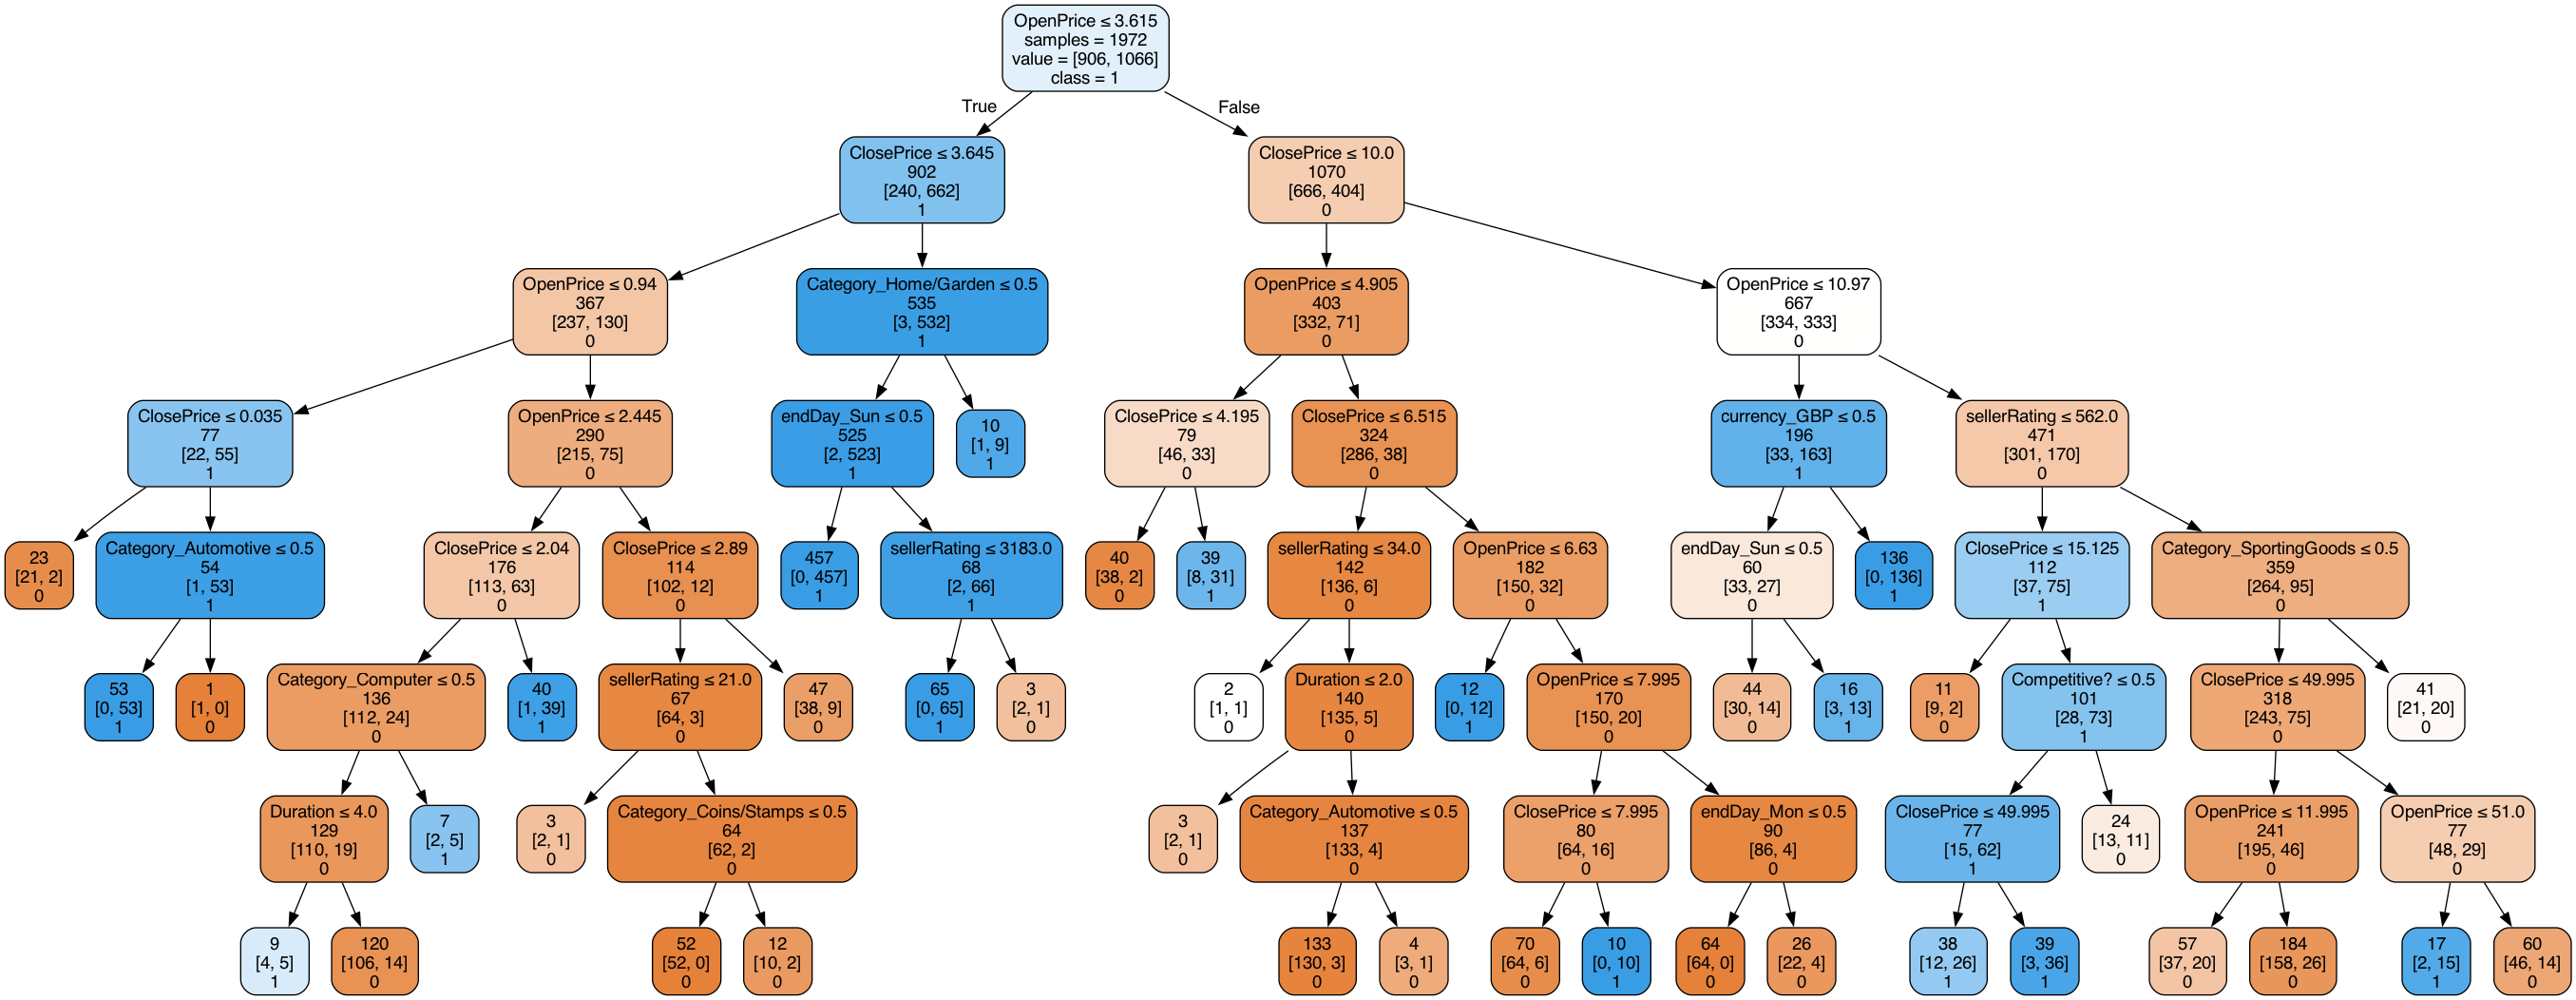

In [45]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

#Try changing max_depth to 3
classTree1 = DecisionTreeClassifier(random_state=0, max_depth=3)
classTree1.fit(auction_df_encoded.drop(columns=['Competitive?']), auction_df_encoded['Competitive?']) #First one is X (predictors) and the second one is Y (target)
classes_str = [str(c) for c in classTree1.classes_]
print("Classes: {}".format(', '.join(classes_str)))
plotDecisionTree(classTree1, feature_names=UB_df_encoded.columns[:16], class_names=classTree1.classes_)

In [46]:
#Develop trees
classTree = DecisionTreeClassifier(min_samples_split=50, max_depth=7, random_state=0)
classTree.fit(train_X, train_y) #First one is X (predictors) and the second one is Y (target)
classificationSummary(train_y, classTree.predict(train_X))


Confusion Matrix (Accuracy 0.8757)

       Prediction
Actual   0   1
     0 510  43
     1 104 526


# Calculate accuracy using classification summary¶

In [47]:
classificationSummary(valid_y, classTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8390)

       Prediction
Actual   0   1
     0 321  32
     1  95 341


# Cross validation

In [49]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.861', '0.899', '0.827', '0.915', '0.903']
Accuracy: 0.881 (+/- 0.065)
Accuracy: 0.881 (+/- 0.032)


#  Smaller classification tree using DecisionTreeClassifier() control parameters.

Small Classification Tree with Control Parameters


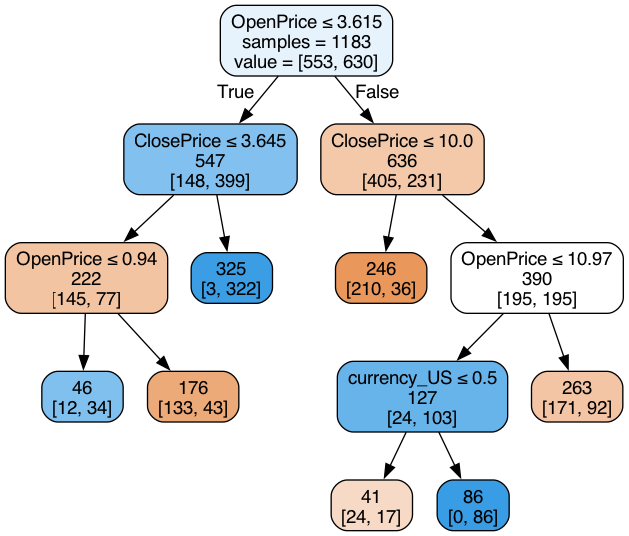

In [50]:
# Create a smaller classification tree for training partition using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 7;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 50.   
smallClassTree = DecisionTreeClassifier(max_depth=7, 
        min_impurity_decrease=0.01, min_samples_split=50)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

#  Grid search

In [51]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [1, 3, 5, 7], 
    'min_samples_split': [10, 20, 30, 40, 50], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.8647929628835014
Initial parameters:  {'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_split': 10}
Improved score:  0.8690230994779375
Improved parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.0009, 'min_samples_split': 10}


In [52]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9434)

       Prediction
Actual   0   1
     0 538  15
     1  52 578
Confusion Matrix (Accuracy 0.8555)

       Prediction
Actual   0   1
     0 320  33
     1  81 355


# Random Forest

In [53]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

                          feature  importance       std
12        Category_EverythingElse    0.001959  0.002705
17           Category_Photography    0.002527  0.003206
18         Category_Pottery/Glass    0.003781  0.003674
10              Category_Computer    0.004176  0.004300
11           Category_Electronics    0.004877  0.003797
6    Category_Business/Industrial    0.005322  0.004375
28                     endDay_Wed    0.005826  0.004477
8           Category_Coins/Stamps    0.006305  0.005241
26                     endDay_Thu    0.006726  0.004794
14           Category_Home/Garden    0.006755  0.004581
15               Category_Jewelry    0.006930  0.005109
21                   currency_GBP    0.007147  0.006111
27                     endDay_Tue    0.008887  0.005296
7   Category_Clothing/Accessories    0.009276  0.006508
5                  Category_Books    0.009678  0.006063
19         Category_SportingGoods    0.010263  0.008383
13         Category_Health/Beauty    0.011069  0

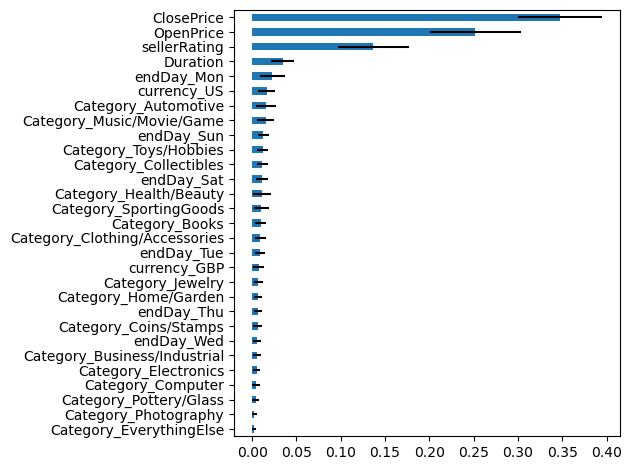

In [54]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Boosted Trees

In [55]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [56]:
classificationSummary(valid_y, boost.predict(valid_X))


Confusion Matrix (Accuracy 0.8859)

       Prediction
Actual   0   1
     0 335  18
     1  72 364


# Question 2

# Assessing the Predictive Utility of a Classification Tree for New Auctions and Iterative Refinement for Improved Predictions

In [57]:
auction_df_encoded = pd.get_dummies(auction_df, columns=['Category', 'currency', 'endDay'], drop_first=True)
print(auction_df_encoded)

      sellerRating  Duration  ClosePrice  OpenPrice  Competitive?  \
0             3249         5        0.01       0.01             0   
1             3249         5        0.01       0.01             0   
2             3249         5        0.01       0.01             0   
3             3249         5        0.01       0.01             0   
4             3249         5        0.01       0.01             0   
...            ...       ...         ...        ...           ...   
1967          2992         5      359.95     359.95             0   
1968            21         5      610.00     300.00             1   
1969          1400         5      549.00     549.00             0   
1970            57         7      820.00     650.00             1   
1971           145         7      999.00     999.00             0   

      Category_Automotive  Category_Books  Category_Business/Industrial  \
0                       0               0                             0   
1                    

In [58]:
predictors =['Duration', 'sellerRating', 'OpenPrice', 'ClosePrice', 'currency_GBP','currency_US', 'endDay_Mon','endDay_Sat', 'endDay_Sun', 'endDay_Thu', 'endDay_Tue', 'endDay_Wed']
outcome = 'Competitive?'


#Partition
X = auction_df_encoded[predictors]
y = auction_df_encoded[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)



In [59]:
classTree = DecisionTreeClassifier(min_samples_split=50, max_depth=7, random_state=0)
classTree.fit(train_X, train_y) #First one is X (predictors) and the second one is Y (target)
classificationSummary(train_y, classTree.predict(train_X))


Confusion Matrix (Accuracy 0.8766)

       Prediction
Actual   0   1
     0 509  44
     1 102 528


# Calculate accuracy using classification summary

In [60]:
classificationSummary(valid_y, classTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8454)

       Prediction
Actual   0   1
     0 316  37
     1  85 351


In [61]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.895', '0.895', '0.823', '0.898', '0.903']
Accuracy: 0.883 (+/- 0.060)
Accuracy: 0.883 (+/- 0.030)


# Grid search

In [62]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [1, 3, 5, 7], 
    'min_samples_split': [10, 20, 30, 40, 50], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.8715583208181362
Initial parameters:  {'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_split': 10}
Improved score:  0.8723986269040978
Improved parameters:  {'max_depth': 12, 'min_impurity_decrease': 0.0009, 'min_samples_split': 11}


In [67]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9324)

       Prediction
Actual   0   1
     0 529  24
     1  56 574
Confusion Matrix (Accuracy 0.8619)

       Prediction
Actual   0   1
     0 316  37
     1  72 364


# Random forest

In [63]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

         feature  importance       std
11    endDay_Wed    0.006289  0.004544
9     endDay_Thu    0.006536  0.004885
4   currency_GBP    0.007151  0.006263
10    endDay_Tue    0.008843  0.005224
7     endDay_Sat    0.010848  0.005901
8     endDay_Sun    0.010859  0.006034
5    currency_US    0.017867  0.009972
6     endDay_Mon    0.024582  0.015521
0       Duration    0.037000  0.013423
1   sellerRating    0.169389  0.046530
2      OpenPrice    0.310207  0.051412
3     ClosePrice    0.390430  0.049029


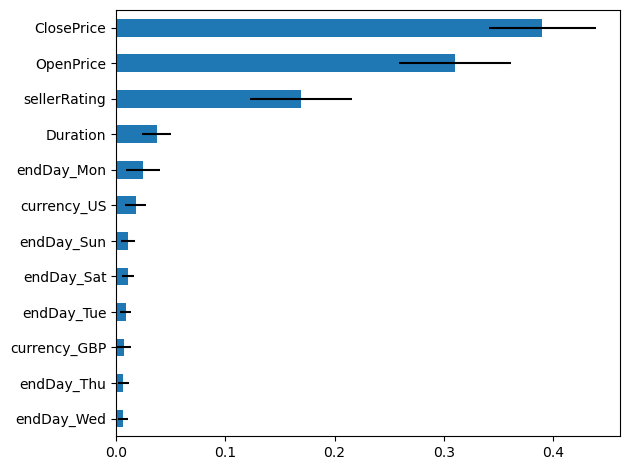

In [64]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Boosted Trees

In [65]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [66]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.8834)

       Prediction
Actual   0   1
     0 335  18
     1  74 362
